# **Restaurant Customer Satisfaction**



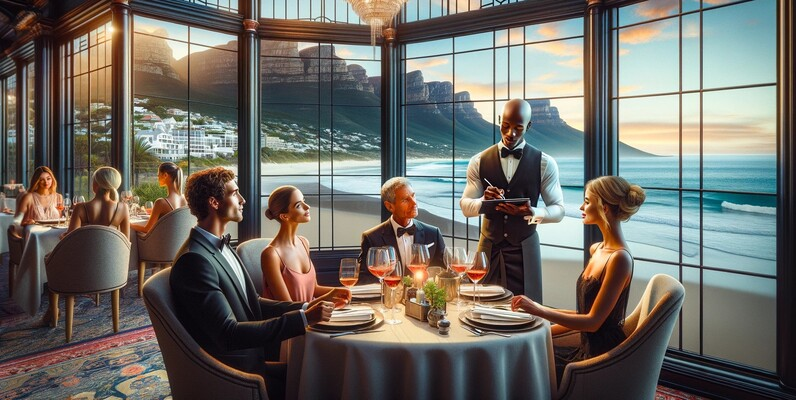




# Overview
Restaurant Customer Satisfaction Prediction is a project that focuses on identifying the key factors influencing customer satisfaction in restaurants. The goal is to predict whether a customer will be satisfied or dissatisfied based on various attributes. By analyzing these factors, we aim to provide insights that can help restaurants enhance their services and improve the overall dining experience for their customers.

**Features**

* CustomerID: Unique identifier for each customer.
* Age: Age of the customer.
* Gender: Gender of the customer (Male/Female).
* Income: Annual income of the customer in USD.
* VisitFrequency: How often the customer visits the restaurant (Daily, Weekly,  
  Monthly, Rarely).
* AverageSpend: Average amount spent by the customer per visit in USD.
* PreferredCuisine: The type of cuisine preferred by the customer (Italian,
  Chinese, Indian, Mexican, American).
* TimeOfVisit: The time of day the customer usually visits (Breakfast,Lunch,Dinner).
* GroupSize: Number of people in the customer's group during the visit.
* DiningOccasion: The occasion for dining (Casual, Business, Celebration).
* MealType: Type of meal (Dine-in, Takeaway).
* OnlineReservation: Whether the customer made an online reservation (0: No, 1: Yes).
* DeliveryOrder: Whether the customer ordered delivery (0: No, 1: Yes).
* LoyaltyProgramMember: Whether the customer is a member of the restaurant's *
  loyalty program (0: No, 1: Yes).
* WaitTime: Average wait time for the customer in minutes.
* Satisfaction Ratings
* ServiceRating: Customer's rating of the service (1 to 5).
* FoodRating: Customer's rating of the food (1 to 5).
* AmbianceRating: Customer's rating of the restaurant ambiance (1 to 5).

**Target Variable**
* HighSatisfaction: Binary variable indicating whether the customer is highly satisfied (1) or not (0).
Potential Applications
Predictive modeling of customer satisfaction.
Analyzing factors that drive customer loyalty and satisfaction.
Identifying key areas for improvement in service, food, and ambiance.
Optimizing marketing strategies to attract and retain satisfied customers.

# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score,roc_curve,precision_score,f1_score,recall_score,auc
from sklearn.preprocessing import LabelEncoder
import warnings
import pickle

# Loading the Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/restaurant_customer_satisfaction.csv')

# Dataset Sample

In [ ]:
df.sample(5)

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
248,902,43,Female,149118,Weekly,90.353087,Italian,Breakfast,8,Casual,Dine-in,1,1,0,38.491561,2,1,5,0
1101,1755,54,Female,113052,Weekly,166.264892,Italian,Dinner,7,Casual,Takeaway,1,1,0,56.057350,1,5,1,0
819,1473,36,Female,42276,Weekly,87.933352,Mexican,Lunch,4,Business,Takeaway,1,0,0,1.662731,3,4,4,0
888,1542,44,Male,28582,Weekly,63.813243,American,Dinner,7,Casual,Dine-in,1,1,0,26.034605,2,4,4,0
940,1594,50,Female,44428,Rarely,187.645833,Chinese,Lunch,4,Business,Takeaway,0,1,1,3.682725,1,2,5,0


# Checking the shape

In [ ]:
df.shape

(1500, 19)

#Describing the dataset

In [ ]:
df.describe()

,CustomerID,Age,Income,AverageSpend,GroupSize,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,1403.500000,43.832000,85921.890000,105.659004,5.035333,0.296667,0.405333,0.480000,30.163550,3.044000,2.997333,2.987333,0.134000
std,433.157015,14.967157,38183.051749,52.381849,2.558864,0.456941,0.491120,0.499766,17.214184,1.423405,1.418920,1.450716,0.340766
min,654.000000,18.000000,20012.000000,10.306127,1.000000,0.000000,0.000000,0.000000,0.001380,1.000000,1.000000,1.000000,0.000000
25%,1028.750000,31.750000,52444.000000,62.287907,3.000000,0.000000,0.000000,0.000000,15.235423,2.000000,2.000000,2.000000,0.000000
50%,1403.500000,44.000000,85811.000000,104.626408,5.000000,0.000000,0.000000,0.000000,30.044055,3.000000,3.000000,3.000000,0.000000
75%,1778.250000,57.000000,119159.250000,148.649330,7.000000,1.000000,1.000000,1.000000,45.285649,4.000000,4.000000,4.000000,0.000000
max,2153.000000,69.000000,149875.000000,199.973527,9.000000,1.000000,1.000000,1.000000,59.970762,5.000000,5.000000,5.000000,1.000000


# Data Frame information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1500 non-null   int64  
 1   Age                   1500 non-null   int64  
 2   Gender                1500 non-null   object 
 3   Income                1500 non-null   int64  
 4   VisitFrequency        1500 non-null   object 
 5   AverageSpend          1500 non-null   float64
 6   PreferredCuisine      1500 non-null   object 
 7   TimeOfVisit           1500 non-null   object 
 8   GroupSize             1500 non-null   int64  
 9   DiningOccasion        1500 non-null   object 
 10  MealType              1500 non-null   object 
 11  OnlineReservation     1500 non-null   int64  
 12  DeliveryOrder         1500 non-null   int64  
 13  LoyaltyProgramMember  1500 non-null   int64  
 14  WaitTime              1500 non-null   float64
 15  ServiceRating        

# Checking for Missing Values

In [ ]:
df.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Income,0
VisitFrequency,0
AverageSpend,0
PreferredCuisine,0
TimeOfVisit,0
GroupSize,0
DiningOccasion,0


# Checking the Datatypes

In [ ]:
df.dtypes

,0
CustomerID,int64
Age,int64
Gender,object
Income,int64
VisitFrequency,object
AverageSpend,float64
PreferredCuisine,object
TimeOfVisit,object
GroupSize,int64
DiningOccasion,object


- Dropping the column **customerId** as it doesnt contribute much to the dataset as a person satisfaction doesn't rely on this id

In [ ]:
df.drop(columns = 'CustomerID',inplace = True)

# Converting all objects to Numeric

In [ ]:
df.sample(10)

,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
1005,49,Female,71896,Monthly,149.852985,American,Dinner,2,Casual,Dine-in,0,0,1,10.207720,2,5,2,0
943,28,Male,109177,Rarely,134.780190,Mexican,Dinner,2,Casual,Dine-in,0,1,0,8.110755,4,3,1,0
1128,28,Female,88464,Monthly,105.252680,Indian,Lunch,8,Celebration,Dine-in,0,0,0,49.614139,3,2,1,0
149,66,Female,28073,Weekly,167.086291,Chinese,Dinner,3,Celebration,Takeaway,0,0,1,0.838749,5,1,1,0
967,45,Female,23533,Weekly,144.200279,Italian,Lunch,9,Celebration,Dine-in,0,1,0,7.795941,5,2,4,0
1272,31,Female,149807,Rarely,167.184428,Italian,Breakfast,8,Business,Takeaway,1,0,1,48.621336,3,4,4,0
1364,50,Male,82562,Monthly,160.585183,American,Lunch,1,Celebration,Takeaway,1,1,0,53.475436,3,2,3,0
1175,25,Female,115020,Weekly,122.799307,Indian,Dinner,3,Celebration,Dine-in,0,1,1,47.217760,5,4,5,1
617,53,Female,103361,Weekly,91.290132,Italian,Dinner,7,Business,Takeaway,0,1,0,21.496293,4,3,5,0
1202,52,Female,136450,Weekly,198.281256,Italian,Breakfast,1,Celebration,Takeaway,0,1,1,33.243809,2,4,3,0


In [ ]:
df['LoyaltyProgramMember'].unique()

array([1, 0])

In [ ]:
col = ['Gender','VisitFrequency','PreferredCuisine','TimeOfVisit','DiningOccasion','MealType']
encoder = LabelEncoder()
for i in col:
    df[i] = encoder.fit_transform(df[i])
df

,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,35,1,83380,3,27.829142,1,0,3,0,1,0,1,1,43.523929,2,5,4,0
1,19,1,43623,2,115.408622,0,1,1,1,0,0,0,0,57.524294,5,5,3,0
2,41,0,83737,3,106.693771,0,1,6,2,0,0,1,0,48.682623,3,4,5,0
3,43,1,96768,2,43.508508,2,2,1,2,0,0,0,0,7.552993,4,5,1,0
4,55,0,67937,1,148.084627,1,0,1,0,1,0,0,1,37.789041,2,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,39,1,114857,1,163.015254,0,2,2,0,0,0,1,1,7.206275,1,2,1,0
1496,37,0,133506,3,190.991911,3,2,4,1,1,0,0,0,37.863952,5,2,2,0
1497,46,1,119159,1,150.088604,0,2,4,1,0,0,1,0,3.925785,3,3,3,1
1498,24,1,27970,3,196.363626,3,1,6,1,0,1,1,0,24.228038,2,2,4,1


# Data visualisation

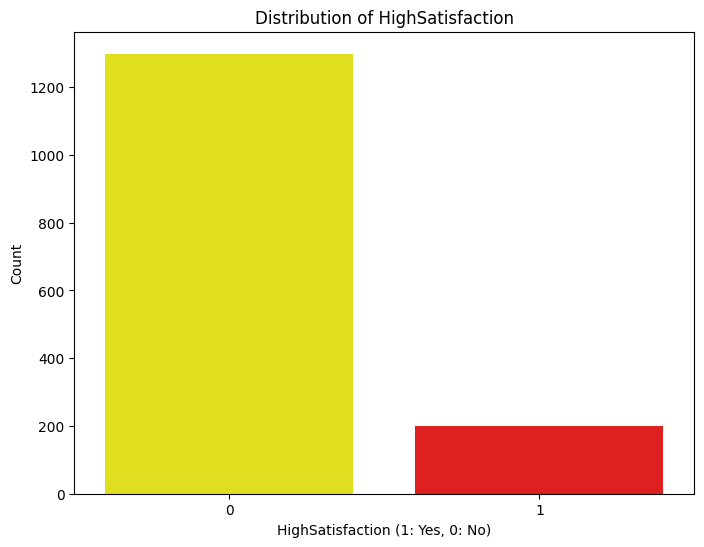

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HighSatisfaction', data=df, palette=['yellow','red'])
plt.title('Distribution of HighSatisfaction')
plt.xlabel('HighSatisfaction (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

# Correlation heatmap

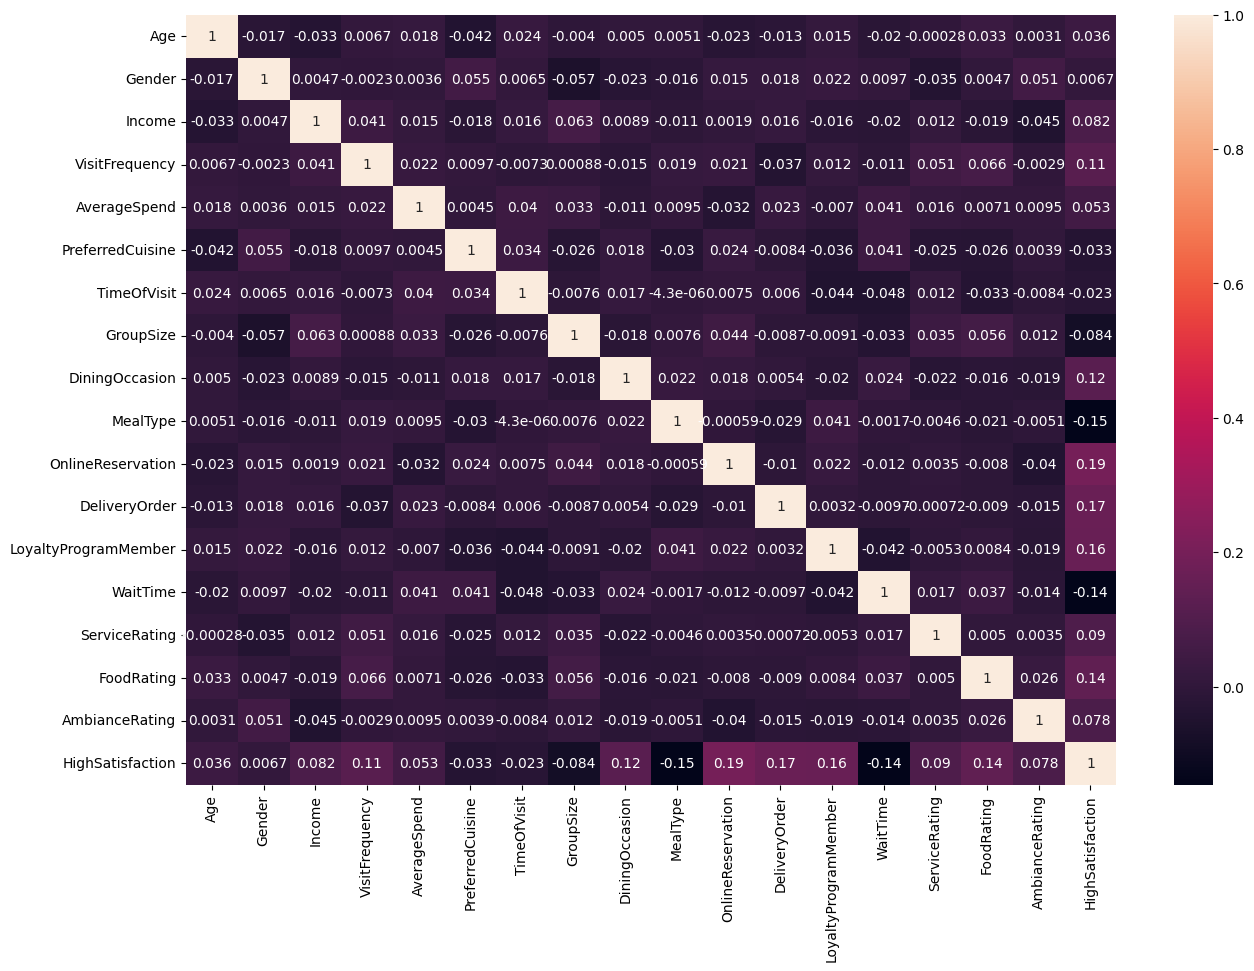

In [ ]:
matrix_disc = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(matrix_disc, annot=True)
plt.show()

# Outlayer detection using BoxPlot

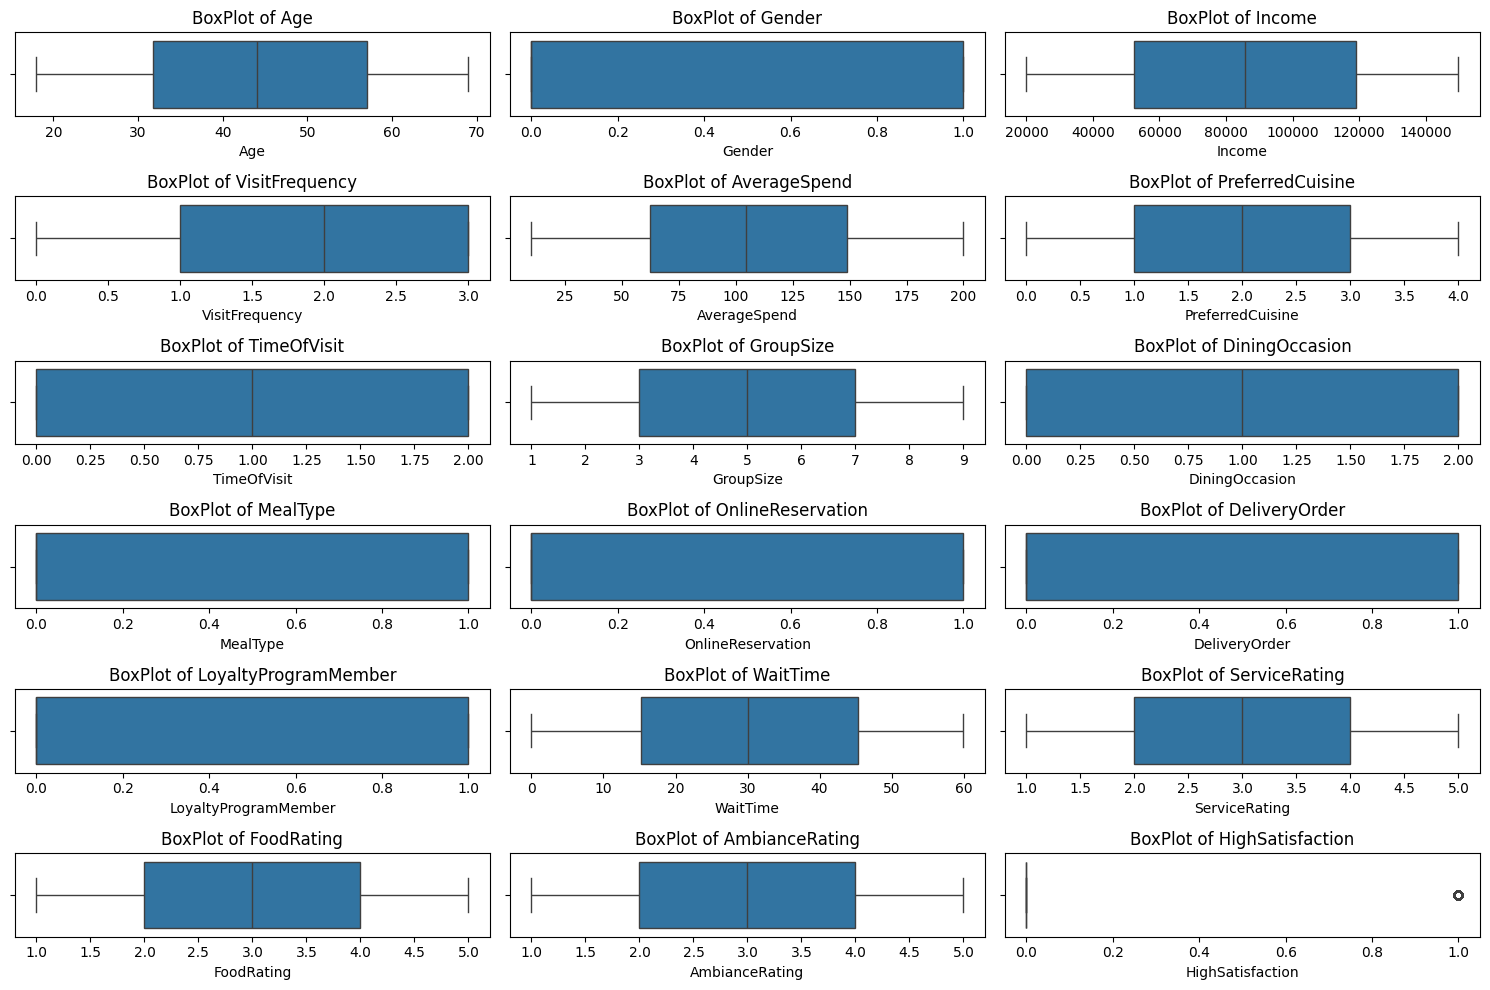

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns

cols = 3  # Number of columns per row
rows = (len(numerical_columns) - 1) // cols + 1  # Number of rows, rounded up

# Visual inspection with box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[column])
    plt.title(f'BoxPlot of {column}')
    plt.tight_layout()
plt.show()

There is no outlayers in the features and the target column shows outlayer because the dataset is imbalanced , since there is no outlayers it suggests that all the data points fall within a reasonable range and the target column can be subjected to sampling to remove the anomaly

# Seperating features from class label

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Scaling the features using MinMax Scaler

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data for training and testing

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=3)

#Model Creation and Evaluating its Performance

In [ ]:
models = {
    "KNeighbors" : KNeighborsClassifier(n_neighbors = 3),
    "Support vector machine" : SVC(kernel = "linear"),
    "Naive bayes" : GaussianNB(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "AdaBoostClassifier" : AdaBoostClassifier(),
    "GradientBoostingClassifier" : GradientBoostingClassifier(),
    "XGB classifier" : XGBClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("-"*53)
    print(model)
    print("-"*53)
    print(classification_report(y_test,y_pred))
    print()
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append([name, accuracy*100, precision*100,recall*100 , f1*100])
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision","Recall" ,"F1-Score"])
warnings.filterwarnings('ignore')


-----------------------------------------------------
KNeighborsClassifier(n_neighbors=3)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       391
           1       0.52      0.19      0.28        59

    accuracy                           0.87       450
   macro avg       0.71      0.58      0.60       450
weighted avg       0.84      0.87      0.84       450


-----------------------------------------------------
SVC(kernel='linear')
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       391
           1       0.79      0.37      0.51        59

    accuracy                           0.90       450
   macro avg       0.85      0.68      0.73       450
weighted avg       0.90      0.90      0.89       450


-----------------------------------------------------
GaussianNB()
----

In [ ]:
results_df.to_csv('modelreportimb.csv',index=False)

In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,KNeighbors,87.111111,84.034780,18.644068,84.348645
1,Support vector machine,90.444444,89.572256,37.288136,88.924196
2,Naive bayes,90.444444,90.824074,28.813559,88.138451
3,Decision Tree,79.111111,80.540860,28.813559,79.791793
4,Random Forest,88.000000,89.456180,8.474576,83.325060
5,AdaBoostClassifier,90.222222,89.280799,35.593220,88.595293
6,GradientBoostingClassifier,89.555556,88.223952,33.898305,87.893889
7,XGB classifier,89.777778,88.675556,32.203390,87.921958


By examining each of the models performance we could see that the dataset is imbalanced

# Checking for imbalance

In [ ]:
df['HighSatisfaction'].value_counts()

,count
HighSatisfaction,
0,1299
1,201


# Balancing the dataset by Oversampling

In [ ]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

#Checking the shape of the resampled data

In [ ]:
X_os.shape,y_os.shape

((2598, 17), (2598,))

# Scaling oversampled dataset

In [ ]:
X_scaled_os=scaler.fit_transform(X_os)

#Spliting the oversampled dataset into training and testing dataset

In [ ]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_scaled_os,y_os,test_size=0.3,random_state=1)

In [ ]:
y_test_os.to_csv('y.csv',index=False)

# Building different ML models after oversampling and evaluating its performance


In [ ]:
models = {
    "KNeighbors" : KNeighborsClassifier(n_neighbors = 3),
    "Support vector machine" : SVC(kernel = "linear"),
    "Naive bayes" : GaussianNB(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "AdaBoostClassifier" : AdaBoostClassifier(),
    "GradientBoostingClassifier" : GradientBoostingClassifier(),
    "XGB classifier" : XGBClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train_os, y_train_os)
    y_pred_os = model.predict(X_test_os)
    print("-"*53)
    print(model)
    print("-"*53)
    print(classification_report(y_test_os,y_pred_os))
    print()
    accuracy = accuracy_score(y_test_os, y_pred_os)
    precision = precision_score(y_test_os, y_pred_os, average='weighted')
    recall = recall_score(y_test_os,y_pred_os)
    f1 = f1_score(y_test_os, y_pred_os, average='weighted')

    results.append([name, accuracy*100, precision*100,recall*100 , f1*100])
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision","Recall" ,"F1-Score"])
warnings.filterwarnings('ignore')

-----------------------------------------------------
KNeighborsClassifier(n_neighbors=3)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.61      0.72       394
           1       0.70      0.92      0.79       386

    accuracy                           0.76       780
   macro avg       0.79      0.76      0.76       780
weighted avg       0.79      0.76      0.76       780


-----------------------------------------------------
SVC(kernel='linear')
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       394
           1       0.74      0.76      0.75       386

    accuracy                           0.74       780
   macro avg       0.75      0.74      0.74       780
weighted avg       0.75      0.74      0.74       780


-----------------------------------------------------
GaussianNB()
----

In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,KNeighbors,76.153846,79.160159,91.968912,75.577316
1,Support vector machine,74.487179,74.514049,75.647668,74.485796
2,Naive bayes,77.435897,77.454783,75.647668,77.426991
3,Decision Tree,80.000000,80.003947,79.015544,79.997238
4,Random Forest,86.794872,86.820361,85.233161,86.790333
5,AdaBoostClassifier,80.256410,80.258244,80.310881,80.256800
6,GradientBoostingClassifier,82.692308,82.762241,84.715026,82.687955
7,XGB classifier,87.948718,87.959602,88.601036,87.948956


In [ ]:
results_df.to_csv('modelreportb.csv',index=False)

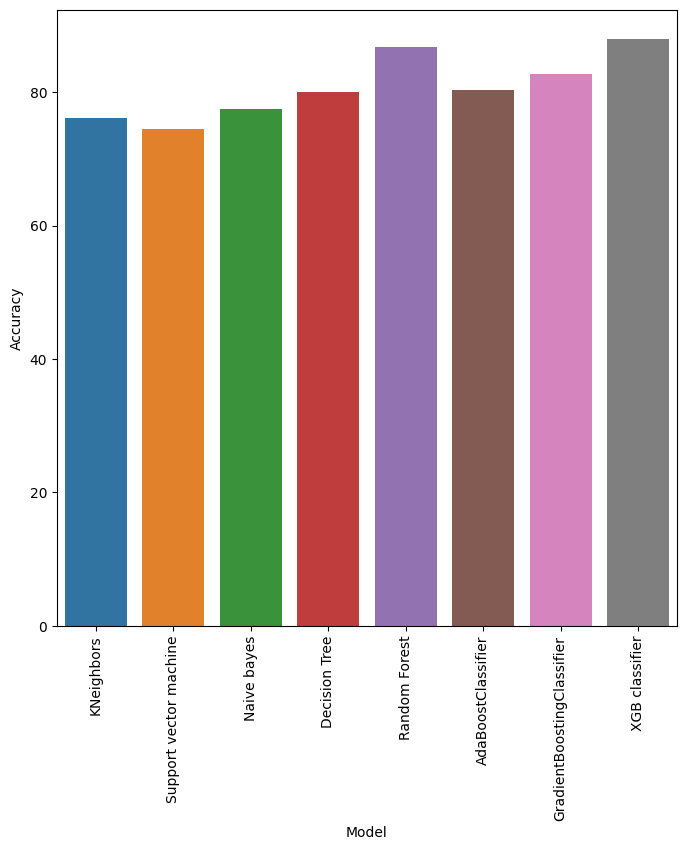

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='Model',y='Accuracy',data=results_df,hue='Model',legend=False)
plt.xticks(rotation=90)
plt.show()

# HyperParmeter tuning using optuna

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.4 MB/s eta 0:00:00


In [ ]:
import optuna
from xgboost import XGBClassifier

def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5),
    }
    xgb = XGBClassifier(**param)
    xgb.fit(X_train_os, y_train_os)
    return accuracy_score(y_test_os, xgb.predict(X_test_os))

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best parameters:", study.best_params)


[I 2024-09-25 13:15:59,996] A new study created in memory with name: no-name-d473fb79-c54d-4e50-8828-d9309e8fc767
[I 2024-09-25 13:16:01,954] Trial 0 finished with value: 0.8730769230769231 and parameters: {'max_depth': 3, 'learning_rate': 0.03220351031761736, 'n_estimators': 991, 'subsample': 0.9773114577125446, 'colsample_bytree': 0.5769916300594329, 'gamma': 0.3211394905491333}. Best is trial 0 with value: 0.8730769230769231.
[I 2024-09-25 13:16:03,927] Trial 1 finished with value: 0.8923076923076924 and parameters: {'max_depth': 3, 'learning_rate': 0.1419806985940123, 'n_estimators': 986, 'subsample': 0.7338549849671162, 'colsample_bytree': 0.6192897800405297, 'gamma': 0.1622291400211175}. Best is trial 1 with value: 0.8923076923076924.
[I 2024-09-25 13:16:04,358] Trial 2 finished with value: 0.9025641025641026 and parameters: {'max_depth': 6, 'learning_rate': 0.14731047893298366, 'n_estimators': 190, 'subsample': 0.7714330752653147, 'colsample_bytree': 0.643157583752815, 'gamma': 

Best parameters: {'max_depth': 9, 'learning_rate': 0.15021084432415427, 'n_estimators': 349, 'subsample': 0.7698314622408782, 'colsample_bytree': 0.6557047039171979, 'gamma': 0.058471189273286026}


In [ ]:
xgb_model = XGBClassifier(
    max_depth=8,
    learning_rate=0.11478374328519891,
    n_estimators=767,
    subsample=0.8017620372991269,
    colsample_bytree=0.7635205523307356,
    gamma=0.0044273530827967505
)

In [ ]:
xgb_model.fit(X_train_os,y_train_os)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7635205523307356, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0044273530827967505,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.11478374328519891,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=767, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_test_os)

In [ ]:
x = pd.DataFrame(y_pred)

In [ ]:
x.to_csv("y_pred.csv",index=False)

In [ ]:
print(classification_report(y_test_os,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       394
           1       0.92      0.92      0.92       386

    accuracy                           0.92       780
   macro avg       0.92      0.92      0.92       780
weighted avg       0.92      0.92      0.92       780



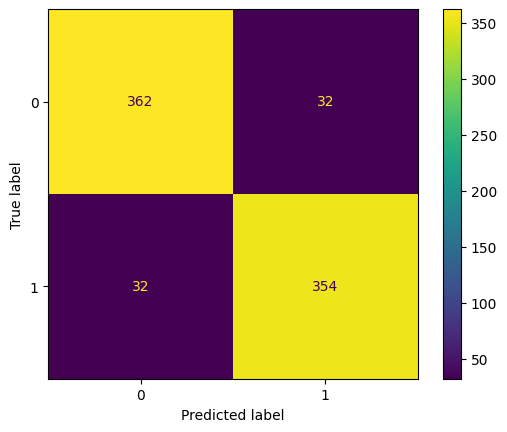

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred))

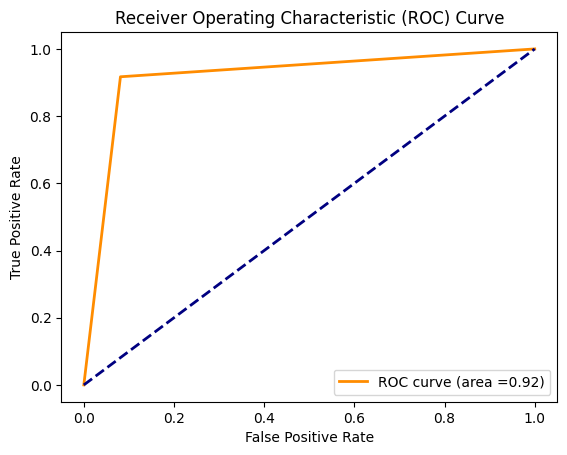

In [ ]:
y_pred_=xgb_model.predict_proba(X_test_os)[:,-1]


fpr,tpr,thresholds = roc_curve(y_test_os, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area ={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve is used to evaluate the performance of a classification model by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

**Key elements from this ROC curve:**
- True Positive Rate (TPR): The vertical axis shows the sensitivity or recall, representing how well the model identifies positive cases.
- False Positive Rate (FPR): The horizontal axis represents the proportion of false positives out of all negative cases.
- ROC Curve (orange): The closer the ROC curve is to the upper-left corner, the better the model's performance.
Diagonal line: The blue dashed line represents the performance of a random classifier (i.e., no predictive power).
- AUC (Area Under the Curve): In this case, the AUC value is 0.92, which indicates excellent performance, as AUC values range from 0.5 (random guessing) to 1.0 (perfect classifier).

**Evaluation:**
With an AUC score of 0.96, the model is performing very well in distinguishing between the positive and negative classes.
The curve is far from the diagonal line, which confirms that the model has strong discriminatory power.

# Prediction

In [ ]:
y_pred = xgb_model.predict(scaler.transform([[35, 1, 83380, 3, 27.829142, 1, 0, 3, 0, 1, 0, 1, 1, 43.523929, 2, 5, 4]]))
if y_pred.item() == 0:
  print("not satisfied")
else:
  print("Highly satisfied")

# Pickle

In [ ]:
pickle.dump(xgb_model,open('model.sav','wb'))
pickle.dump(scaler,open('scaler.sav','wb'))